# Loading DataSet

In [1]:
import pandas as pd
import numpy as np

np.random.seed(37)
df = pd.read_csv("common-dataset.csv")
df.head()

,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,False,False,False,-52,-2,17,1,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,False,False,False,2,7,14,-5,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,False,False,False,0,6,10,8,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,False,False,False,2,5,3,0,...,-25,51,-6,-45,-4,61,48,60,46,5


In [2]:
data=df.values


# Splitting DataSet

In [3]:
y_user_id = data[:,0]
y_touch_type = data[:,1]
# y_touch_ver = data[:,2:6]
y_user_id=y_user_id.astype('int64')
y_touch_type=y_touch_type.astype('int64')
# y_touch_ver=y_touch_ver.astype('bool')

In [4]:
x=data[:,6:]
x=x.astype('int64')
x

array([[  4,   0,  12, ...,  61,   2,  -1],
       [-52,  -2,  17, ...,  63,  47,   6],
       [  2,   7,  14, ...,   9,  55,  52],
       ...,
       [  8,  -9, -12, ...,  20,  64,  68],
       [ 56,   0,   0, ...,   6,  -6,  51],
       [ 11,  -1, -12, ...,   9,  52,  52]], dtype=int64)

# Setting Train and Test Data 

In [5]:
from sklearn.model_selection import train_test_split
x_train_user_id, x_test_user_id, y_train_user_id, y_test_user_id = train_test_split(x, y_user_id, test_size = 0.25, random_state = 37)
x_train_touch_type, x_test_touch_type, y_train_touch_type, y_test_touch_type = train_test_split(x, y_touch_type, test_size = 0.25, random_state = 37)

# Clustering with KMeans

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=37).fit(x_train_user_id)
label = kmeans.predict(x_test_user_id)
label.shape

(514,)

In [7]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test_user_id, label))
print("Completeness: %0.3f" % metrics.completeness_score(y_test_user_id, label))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test_user_id, label))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test_user_id, label))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(x_test_user_id, label, sample_size=1000)
)

Homogeneity: 0.927
Completeness: 0.936
V-measure: 0.932
Adjusted Rand-Index: 0.829
Silhouette Coefficient: 0.179


In [8]:
count_y= np.bincount(y_test_user_id)
c_kmlabels_ = np.bincount(label)
c_kmlabels_

array([10, 10, 22, 13, 19, 17, 15,  7, 17, 17, 37, 23, 25, 14, 20, 10, 21,
       13, 10, 10, 32, 21, 10, 18, 19, 12, 17, 21, 13, 21], dtype=int64)

# Visualization of Data

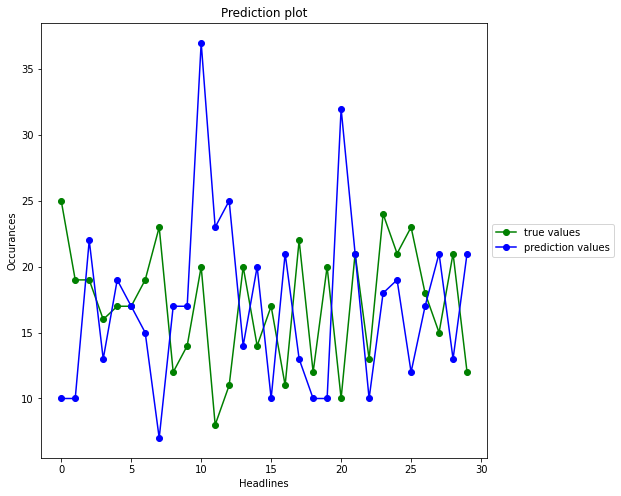

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize = (8, 8))
x = np.array(range(30))
y = np.array([
    count_y,
    c_kmlabels_

])
plt.title("Prediction plot")
plt.xlabel("Headlines")
plt.ylabel("Occurances")

for i, array in enumerate(y):
    plt.plot(x, array, color = 'g' if i==0 else 'b', marker = "o", label = "true values" if i==0 else "prediction values")
    
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Clustering with KMeans Touch Type

In [10]:
kmeans_tt = KMeans(n_clusters=10, random_state=37).fit(x_train_touch_type)

In [11]:
label = kmeans_tt.predict(x_test_touch_type)
label.shape
# y_test_user_id.shape

(514,)

# Performance Results

In [12]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test_touch_type, label))
print("Completeness: %0.3f" % metrics.completeness_score(y_test_touch_type, label))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test_touch_type, label))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(y_test_touch_type, label))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(x_test_user_id, label, sample_size=1000)
)

Homogeneity: 0.197
Completeness: 0.158
V-measure: 0.176
Adjusted Rand-Index: 0.069
Silhouette Coefficient: 0.081


In [13]:
count_y= np.bincount(y_test_touch_type)
c_kmlabels_ = np.bincount(label)
count_y

array([281,  27,  31,  24,  21,  33,  21,  27,  28,  21], dtype=int64)

# Visualization of Data

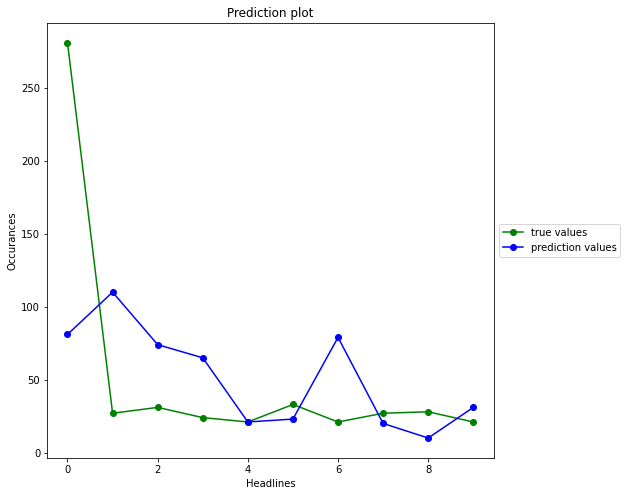

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize = (8, 8))
x = np.array(range(10))
y = np.array([
    count_y,
    c_kmlabels_

])
plt.title("Prediction plot")
plt.xlabel("Headlines")
plt.ylabel("Occurances")

for i, array in enumerate(y):
    plt.plot(x, array, color = 'g' if i==0 else 'b', marker = "o", label = "true values" if i==0 else "prediction values")
    
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()

Clustering does not working well with touch types because data is the most on the zeros.

# Visualization on Predicted Values of User ID

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

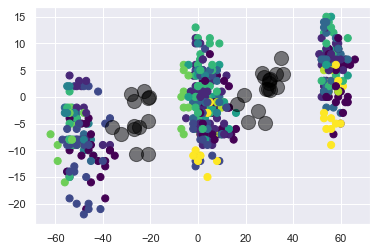

In [16]:
plt.scatter(x_test_user_id[:, 0], x_test_user_id[:, 1], c=label, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);